## IFBA Charts

Irish Fish Biochronology Archive

You can install it using the Anaconda Environment tab, or by executing the following in your terminal pip install seaborn or conda install seaborn.

Shift + Tab after attribute to see options

### Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

# IFBA Data Load

In [3]:
ifba_df = pd.read_csv('../data/ifba_view.csv')
# ifba_df = ifba_df.drop(columns=['GEOM'])
# ifba_df.to_csv('../data/ifba_view_change.csv')
cols = ['Field_Length', 'Fish_Weight']
ifba_df[cols] = ifba_df[cols].mask(ifba_df[cols].eq(0).all(axis=1))
ifba_df.columns

Index(['date_to_use', 'IFBA_ID', 'SampleLabel', 'APPROXIMATE_SAMPLE_AMOUNT',
       'ARCHIVIST_COMMENTS', 'containername', 'containerID', 'date_collected',
       'Fate', 'Field_Comments', 'Field_Length', 'Fish_Weight', 'Fish_Origin',
       'IN_IFBA_TS_TABLE', 'LAB_Number', 'Fish_Life_Stage',
       'REPRESENTATIVE_SAMPLE', 'SpeciesName', 'CREATED_BY', 'modified_by',
       'createddate', 'lastmodifieddate', 'locationName',
       'locationDescription', 'NAME'],
      dtype='object')

In [4]:
# IWB temp data from online source
# ifba_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IWBNetwork.csvp?station_id%2Ctime%2CAtmosphericPressure%2CWindDirection%2CWindSpeed%2CWaveHeight%2CWavePeriod%2CSeaTemperature%2Csalinity')

# from local source
# ifba_df = pd.read_csv('../data/ifba_view.csv')
ifba_df['date_to_use'] = pd.to_datetime(ifba_df['date_to_use'])
ifba_df['year'] = ifba_df['date_to_use'].dt.year
ifba_df['month'] = ifba_df['date_to_use'].dt.month
ifba_df['day'] = ifba_df['date_to_use'].dt.day
ifba_df['mean_length_yr_species'] = ifba_df.groupby(['year', 'SpeciesName'])[
    'Field_Length'].transform('mean')
ifba_df['mean_weight_yr_species'] = ifba_df.groupby(['year', 'SpeciesName'])[
    'Fish_Weight'].transform('mean')
# convert number months to the text months for easier display
ifba_df['months'] = ifba_df['date_to_use'].dt.strftime('%b')

ifba_df.columns

Index(['date_to_use', 'IFBA_ID', 'SampleLabel', 'APPROXIMATE_SAMPLE_AMOUNT',
       'ARCHIVIST_COMMENTS', 'containername', 'containerID', 'date_collected',
       'Fate', 'Field_Comments', 'Field_Length', 'Fish_Weight', 'Fish_Origin',
       'IN_IFBA_TS_TABLE', 'LAB_Number', 'Fish_Life_Stage',
       'REPRESENTATIVE_SAMPLE', 'SpeciesName', 'CREATED_BY', 'modified_by',
       'createddate', 'lastmodifieddate', 'locationName',
       'locationDescription', 'NAME', 'year', 'month', 'day',
       'mean_length_yr_species', 'mean_weight_yr_species', 'months'],
      dtype='object')

### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='Field_Length', ylabel='Density'>

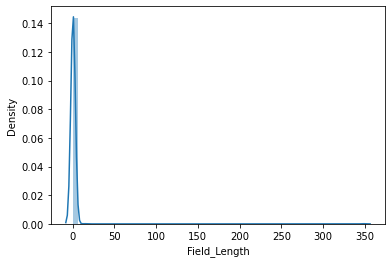

In [28]:
sns.distplot(ifba_df['Field_Length'])

<AxesSubplot:xlabel='Fish_Weight'>

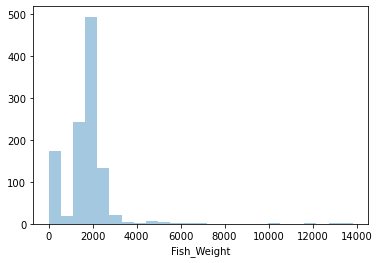

In [62]:
# Provides a way to look at a univariate distribution. A 
# univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(ifba_df['Fish_Weight'], kde=False, bins=25)

### Joint Plot

In [ ]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

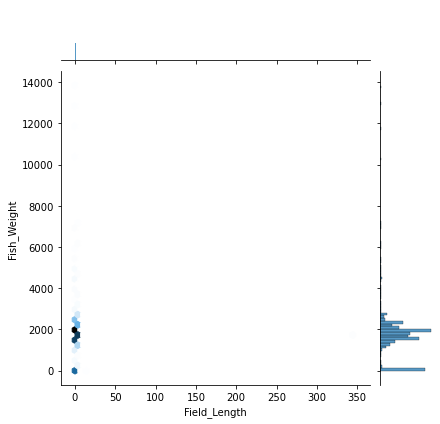

In [63]:
sns.jointplot(x='Field_Length', y='Fish_Weight', data=ifba_df, kind='hex')

### KDE Plot

<AxesSubplot:xlabel='Field_Length', ylabel='Density'>

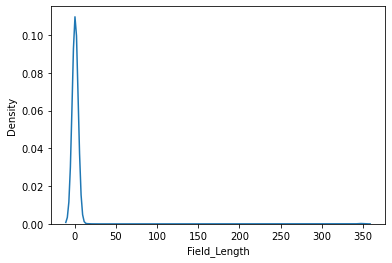

In [64]:
# Get just the KDE plot
sns.kdeplot(ifba_df['Field_Length'])

### Pair Plots

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


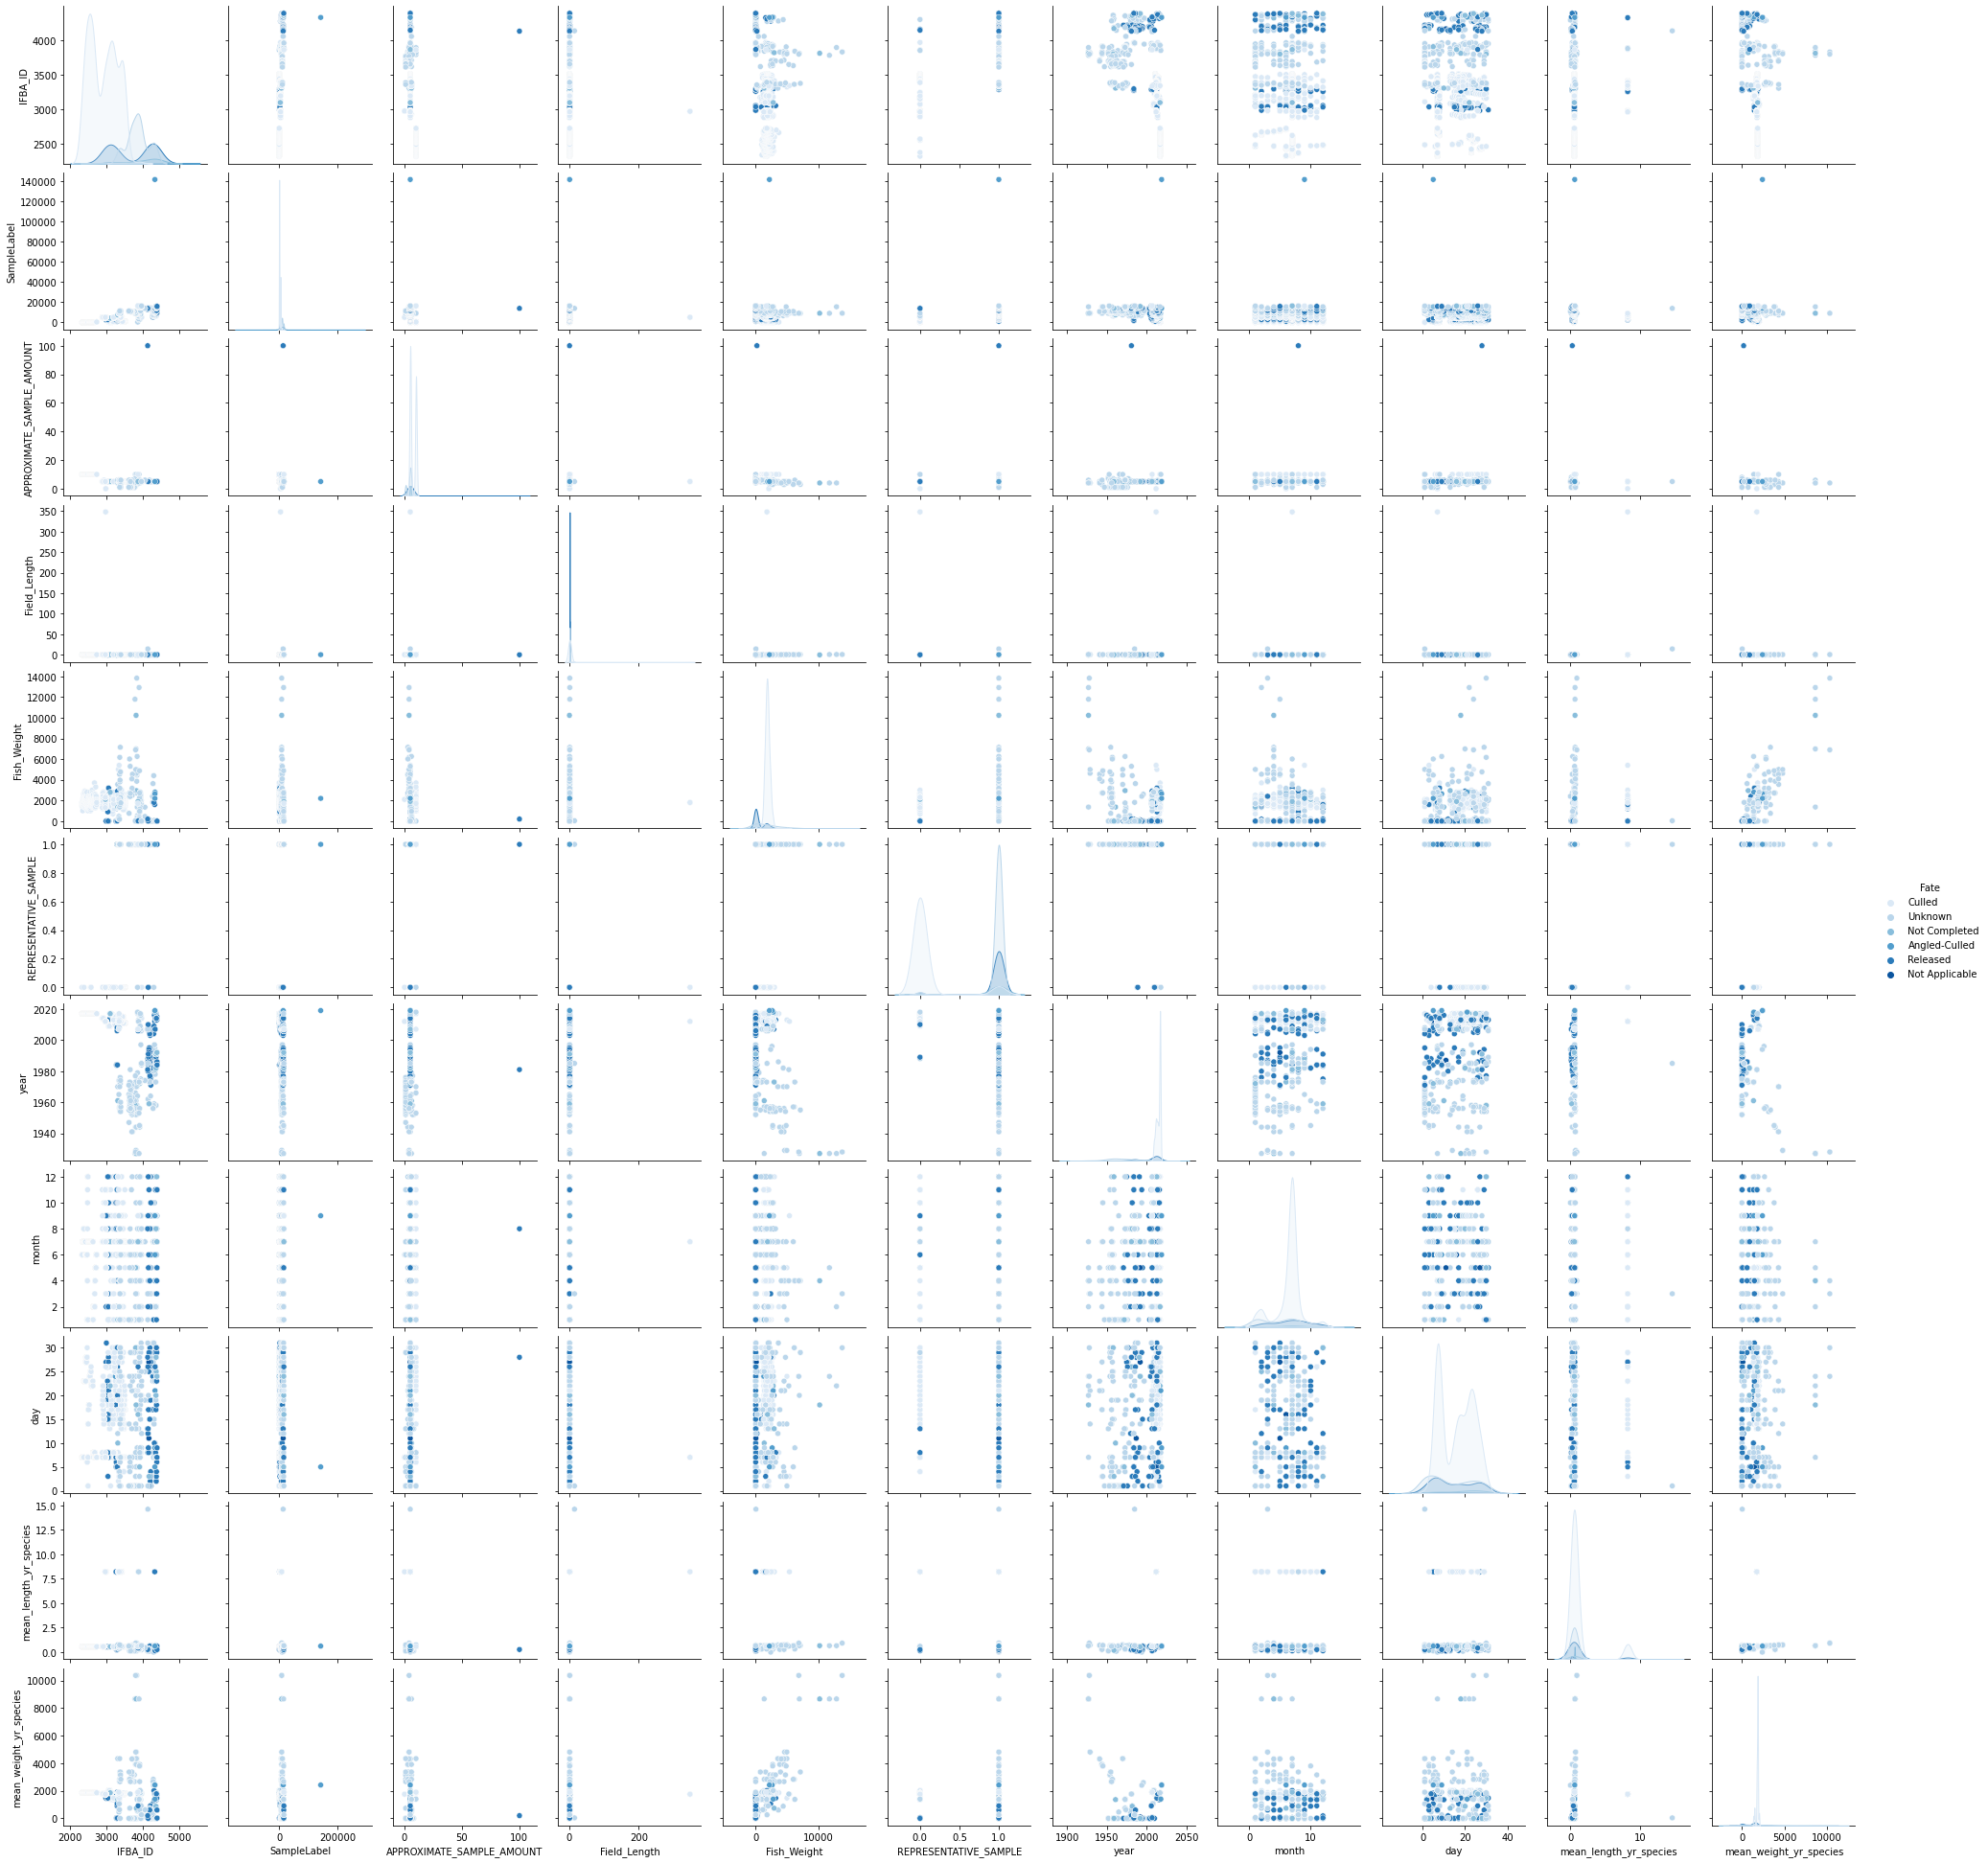

In [65]:
# Pair Plot plots relationships across the entire data frames numerical values
# sns.pairplot(ifba_df)

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
sns.pairplot(ifba_df, hue='Fate', palette='Blues')

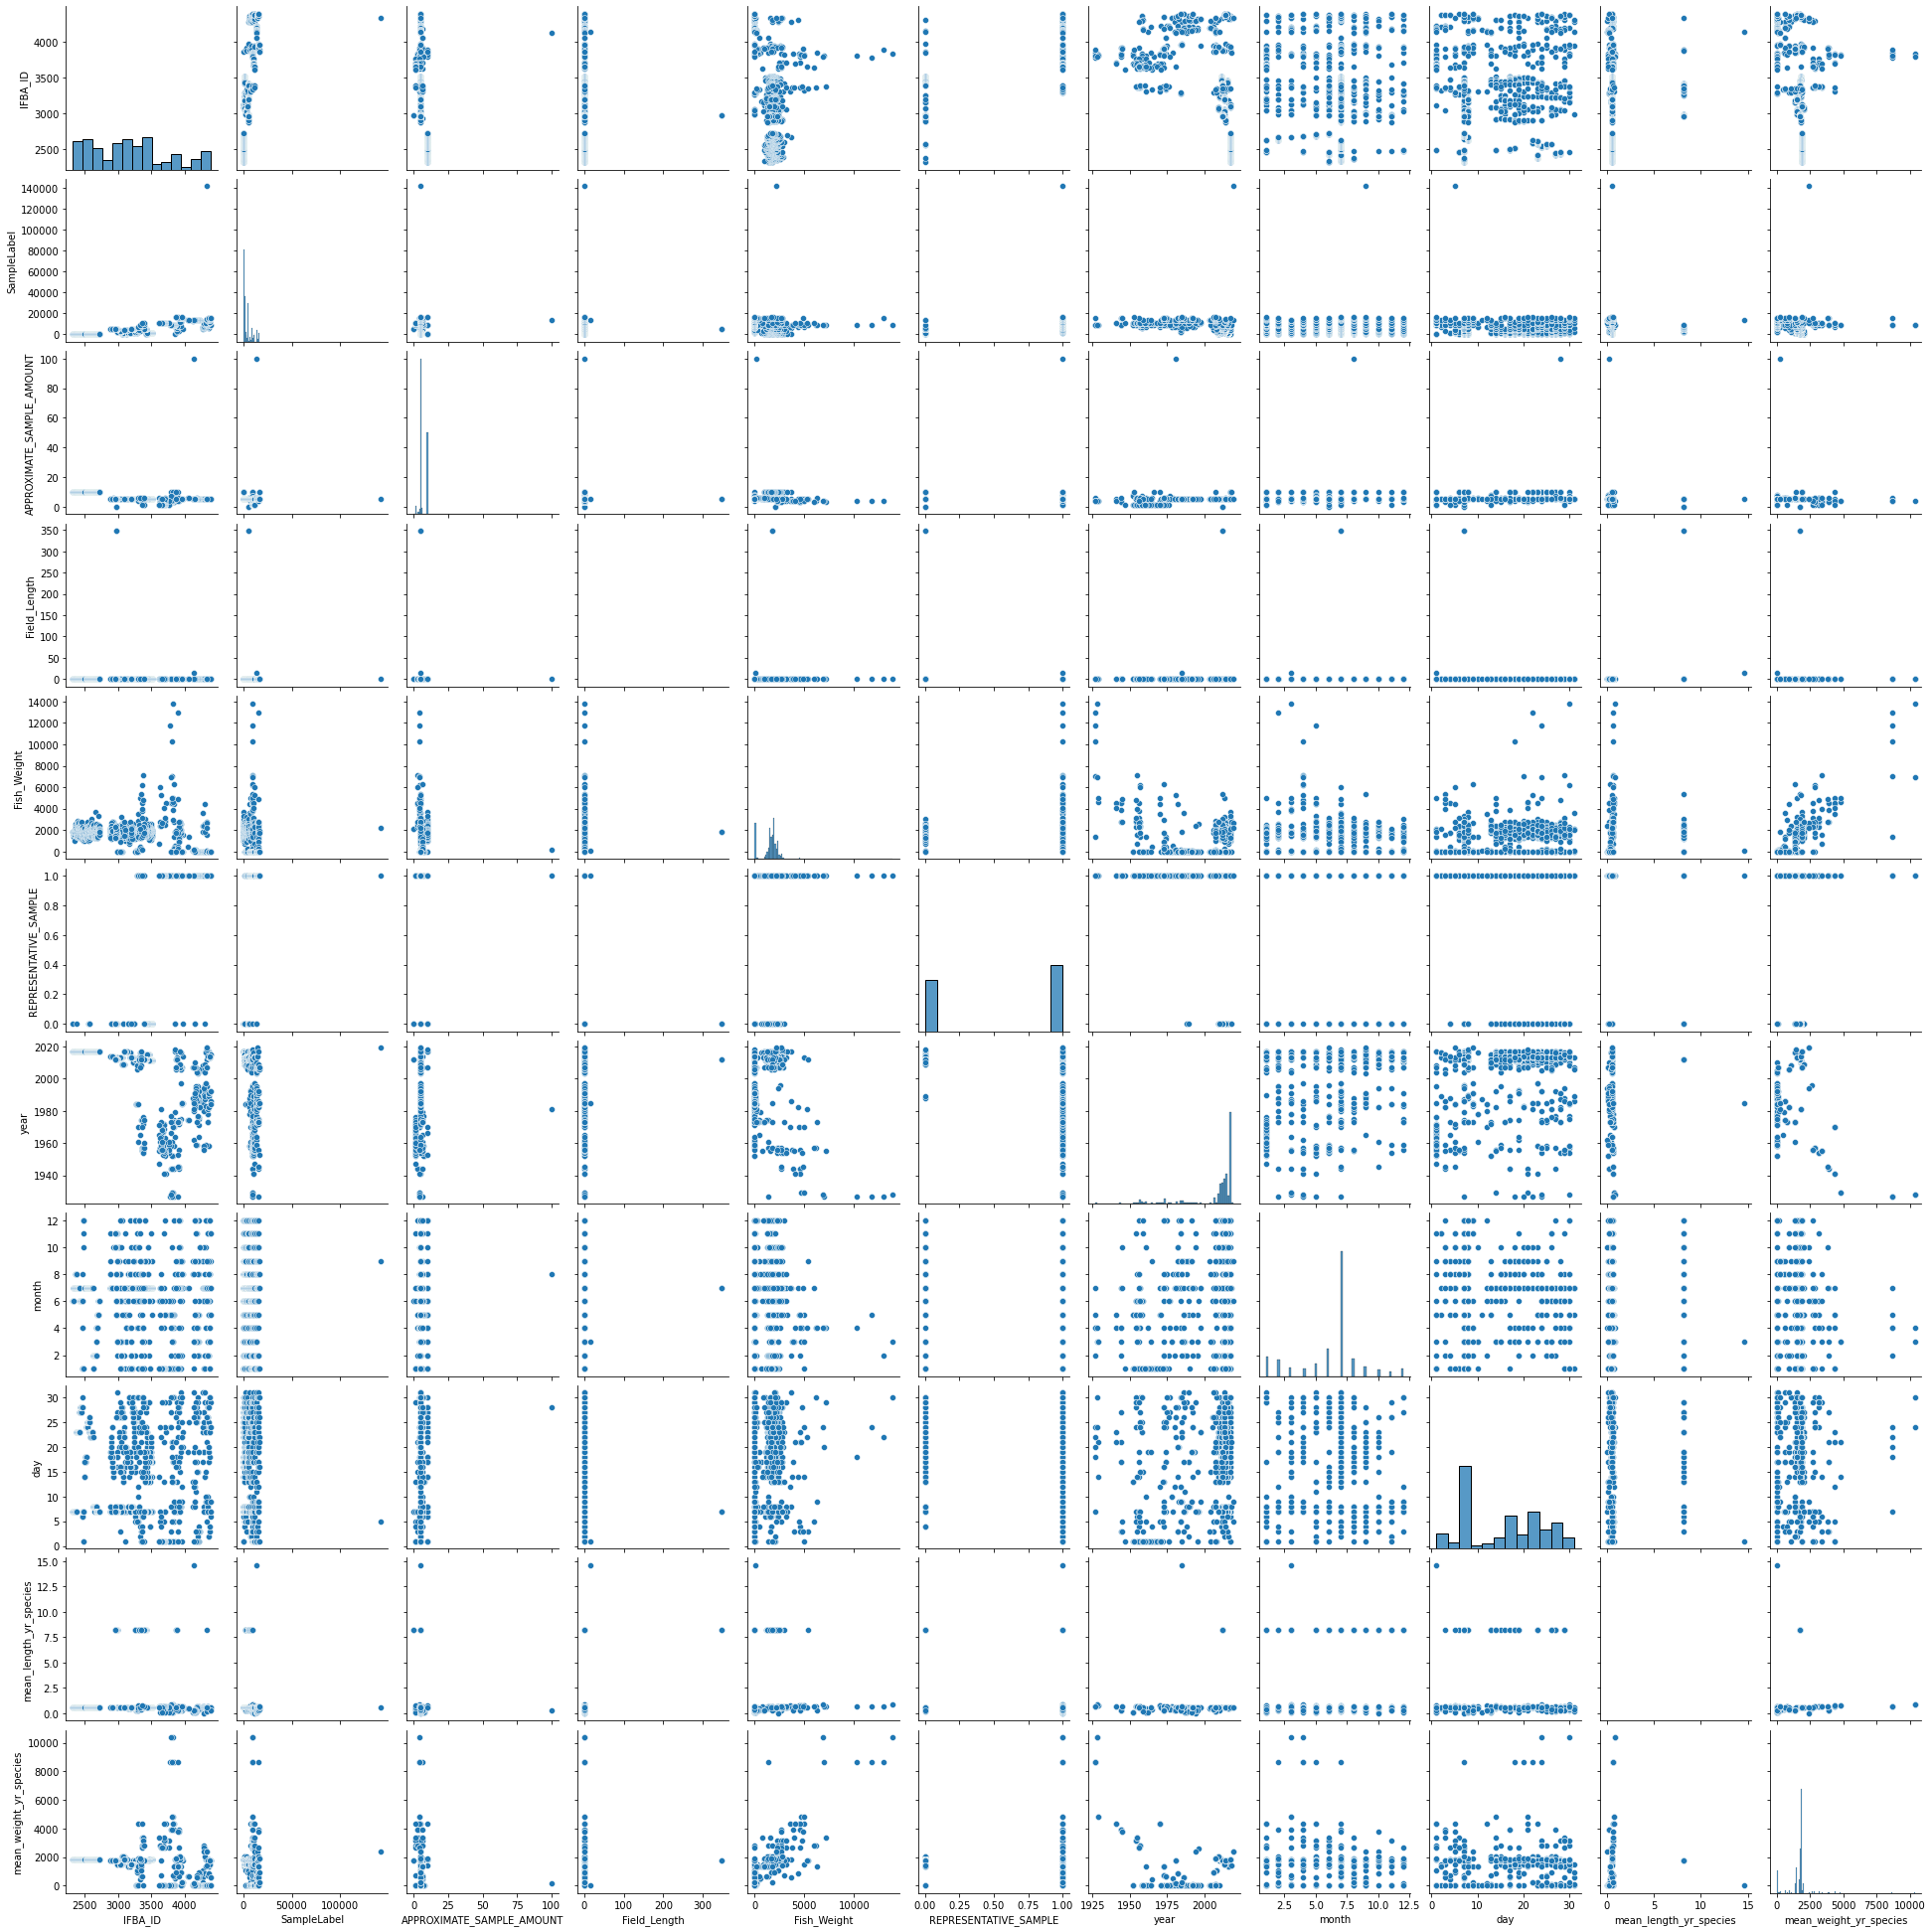

In [66]:
sns.pairplot(ifba_df)

### Rug Plots

<AxesSubplot:xlabel='Field_Length'>

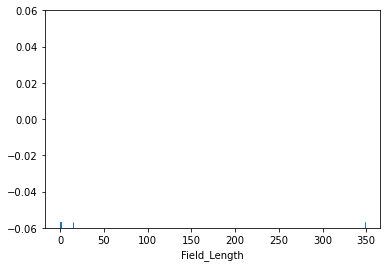

In [67]:
# Plots a single column of datapoints in an array as sticks on an axis
# With a rug plot you'll see a more dense number of lines where the amount is 
# most common. This is like how a histogram is taller where values are more common
sns.rugplot(ifba_df['Field_Length'])

### Styling

<Figure size 1584x1008 with 0 Axes>

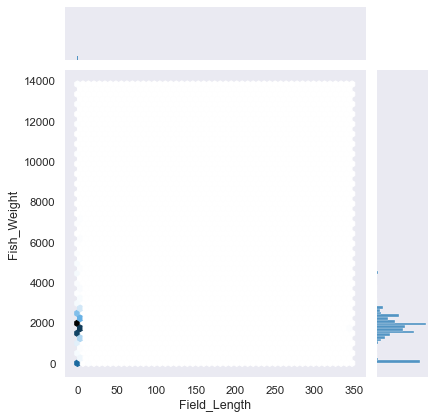

In [69]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('dark')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(22,14))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.3)

sns.jointplot(x='Field_Length', y='Fish_Weight', data=ifba_df, kind='hex', palette='Reds')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='year', ylabel='Fish_Weight'>

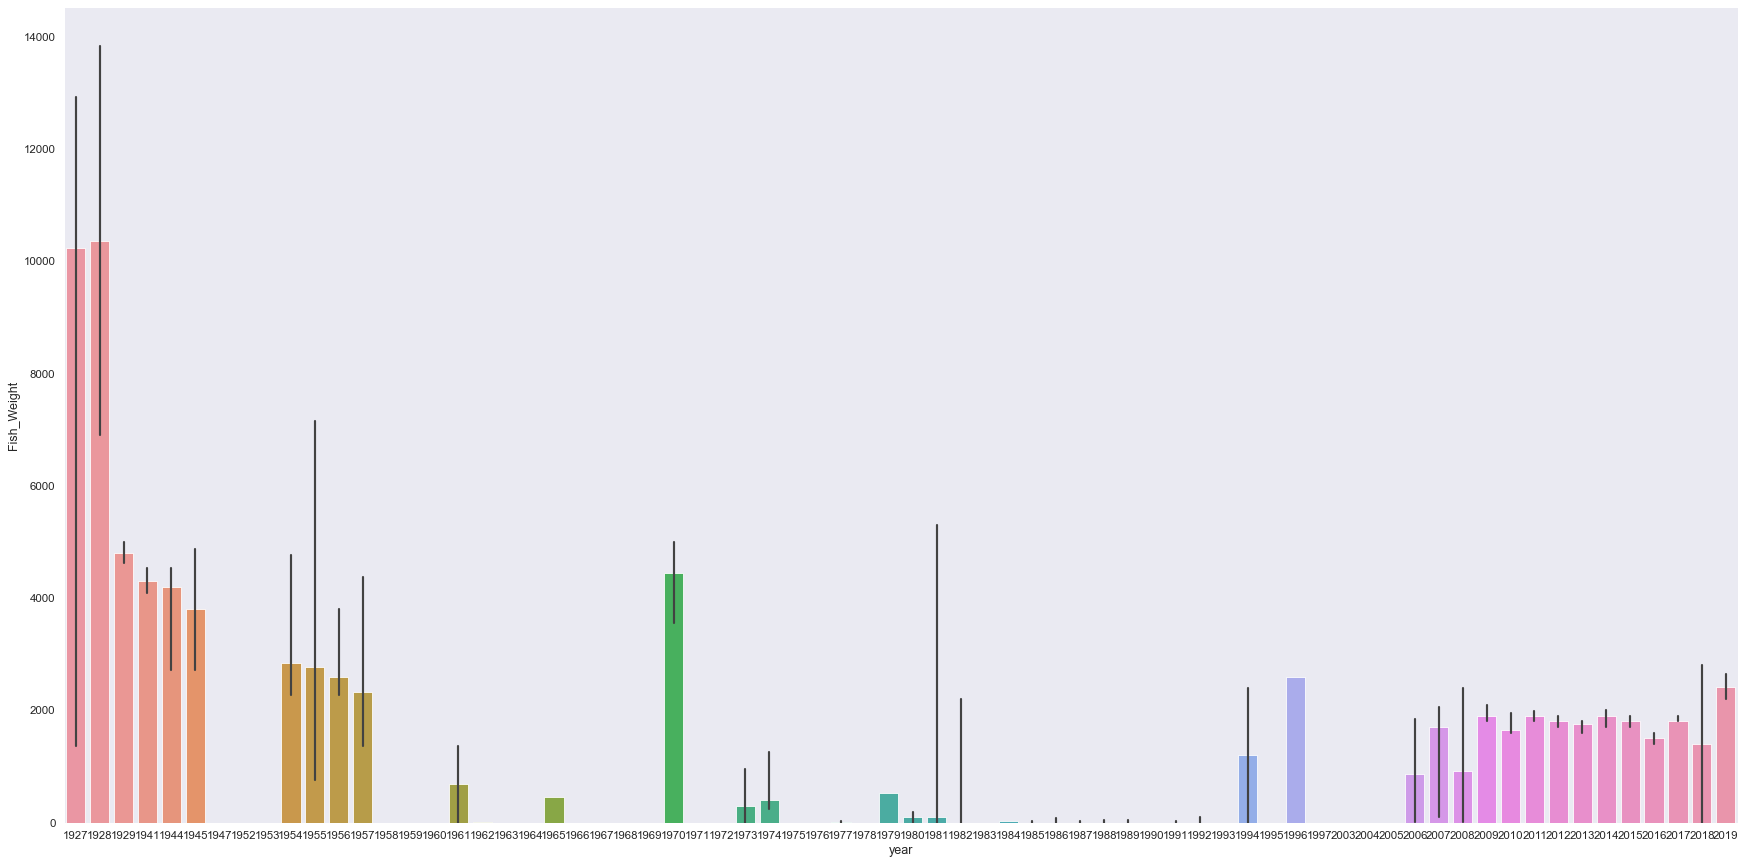

In [75]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
plt.figure(figsize=(30,15))

sns.barplot(x='year',y='Fish_Weight',data=ifba_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='count', ylabel='mean_weight_yr_species'>

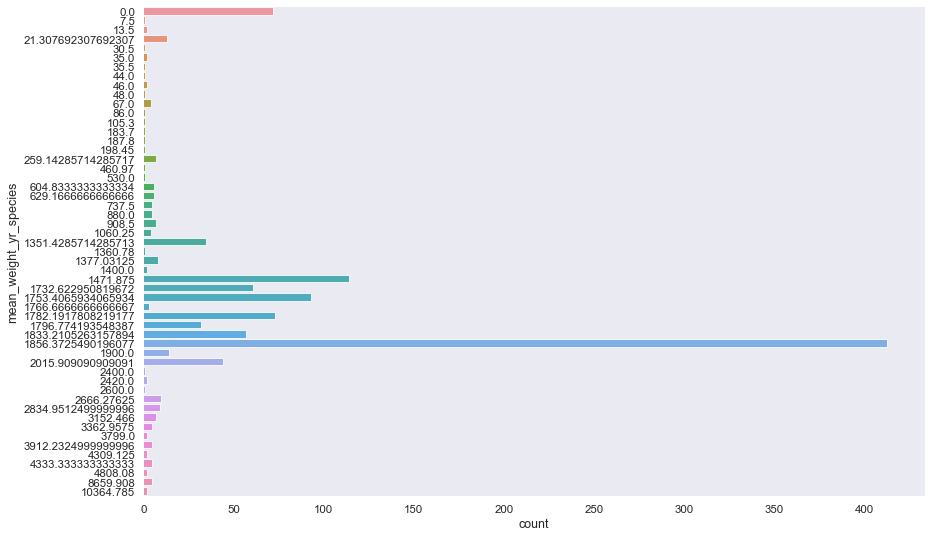

In [76]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
plt.figure(figsize=(14,9))

sns.countplot(y='mean_weight_yr_species', data=ifba_df)

### Box Plot

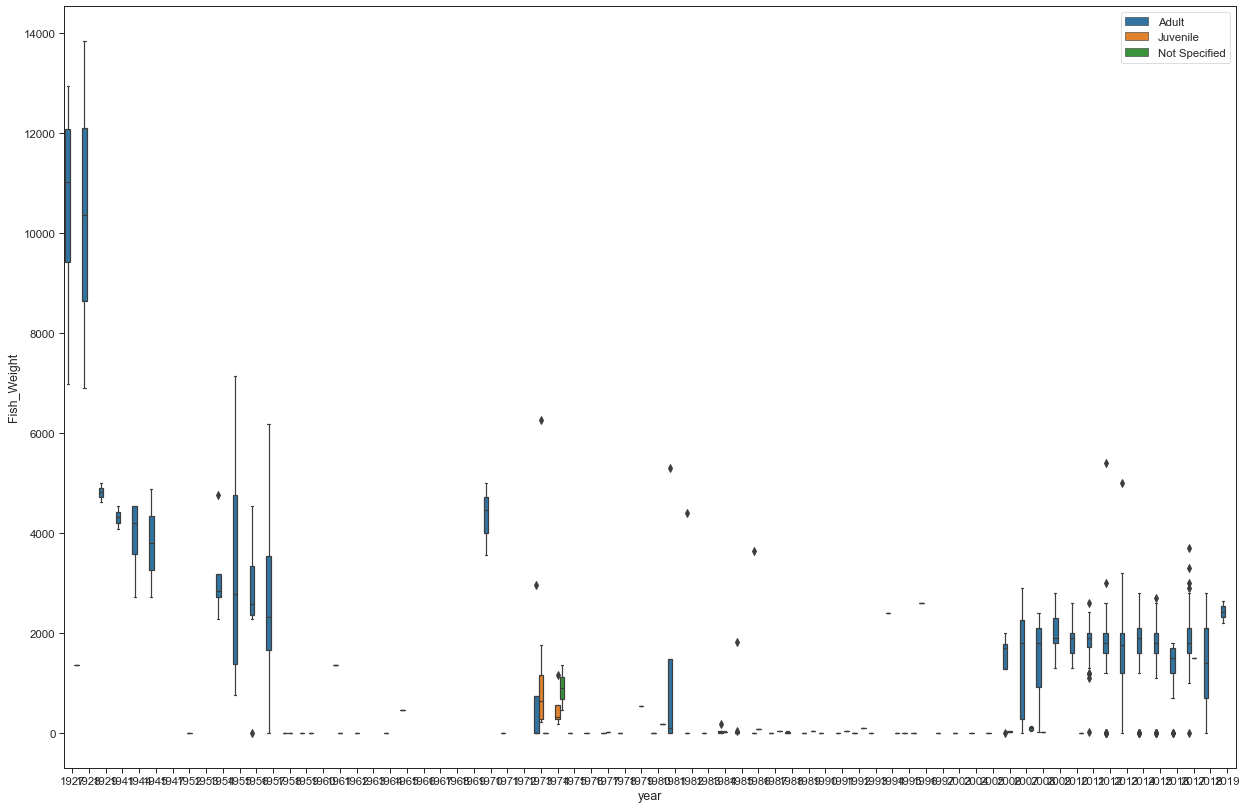

In [80]:
plt.figure(figsize=(21,14))
sns.set_style('ticks')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='year',y='Fish_Weight',data=ifba_df, hue='Fish_Life_Stage')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='year', ylabel='Field_Length'>

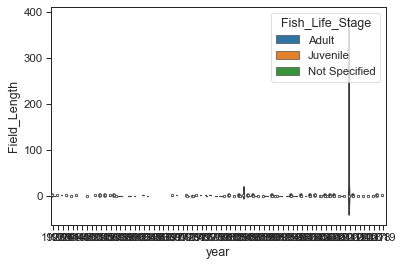

In [84]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='year',y='Field_Length',data=ifba_df, hue='Fish_Life_Stage',split=False)

### Strip Plot

<AxesSubplot:xlabel='year', ylabel='Field_Length'>

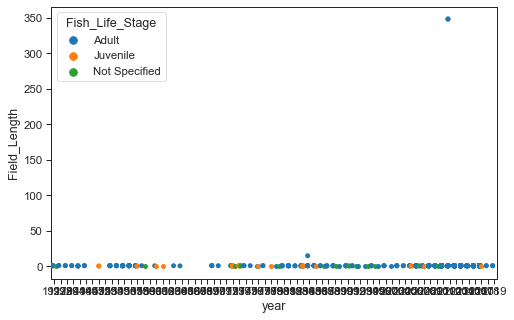

In [85]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='year',y='Field_Length',data=ifba_df, jitter=True, 
              hue='Fish_Life_Stage', dodge=True)

### Swarm Plot

C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may wan

<AxesSubplot:xlabel='year', ylabel='Field_Length'>

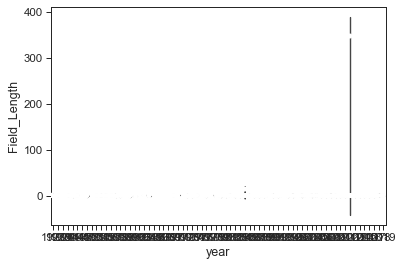

In [86]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='year',y='Field_Length',data=ifba_df)
sns.swarmplot(x='year',y='Field_Length',data=ifba_df, color='white')


### Palettes

In [91]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='year',y='Field_Length',data=ifba_df, hue='Species_Name', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

ValueError: Could not interpret input 'Species_Name'

<Figure size 576x432 with 0 Axes>

### Matrix Plots

### Heatmaps

<AxesSubplot:>

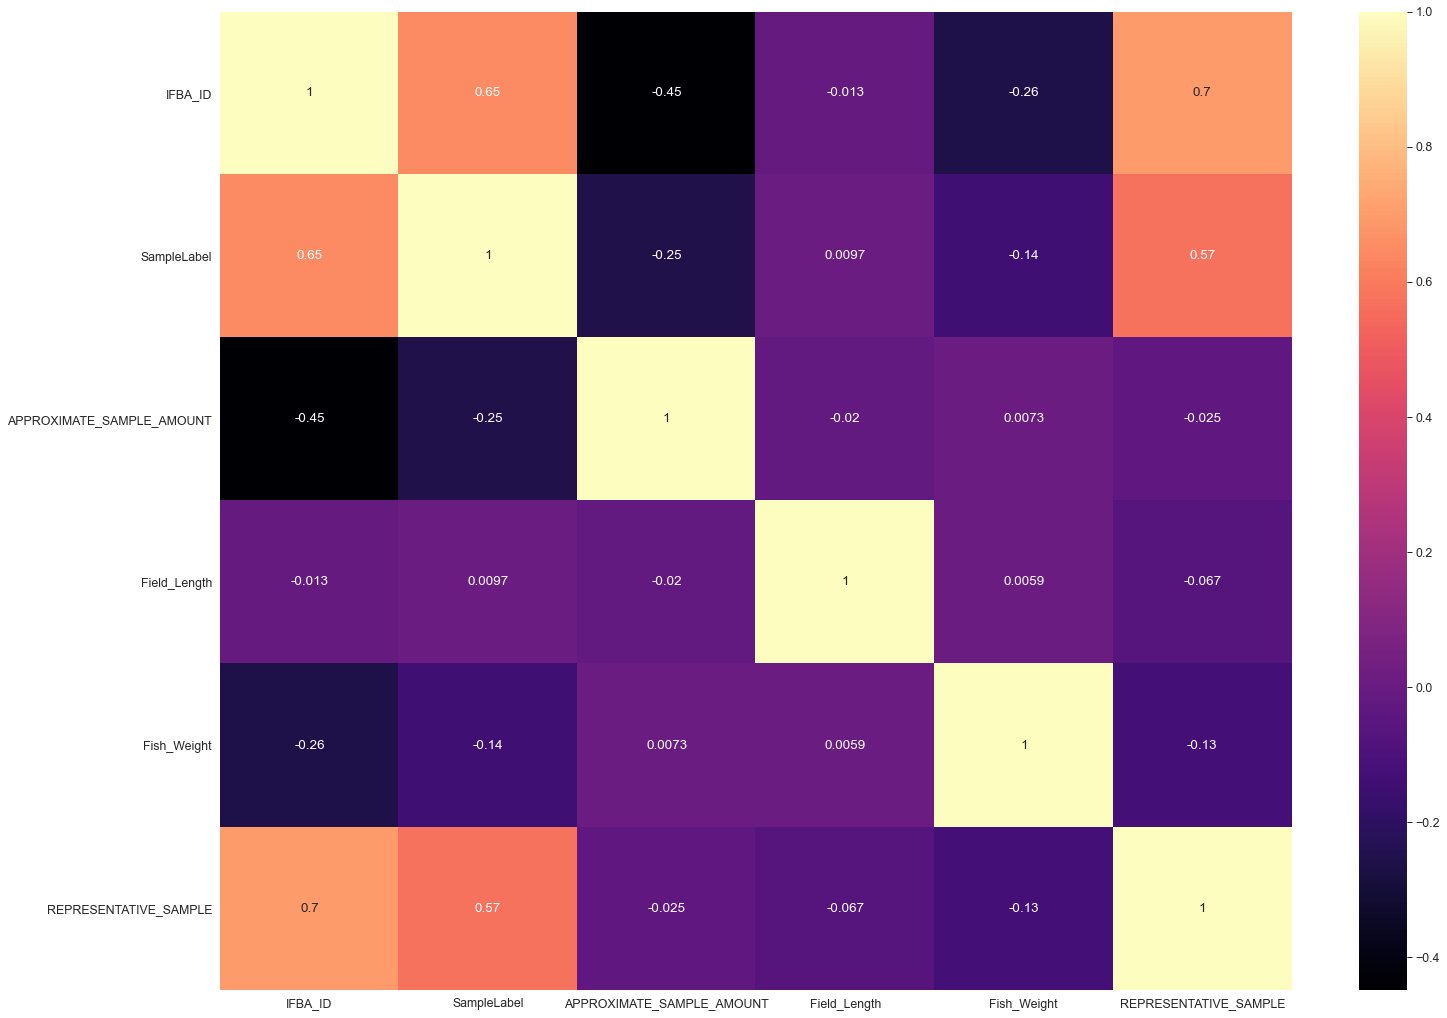

In [96]:
plt.figure(figsize=(24,18))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
ifba_mx = ifba_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(ifba_mx, annot=True, cmap='magma')

[Text(0.5, 1.0, 'IFBA Sampling')]

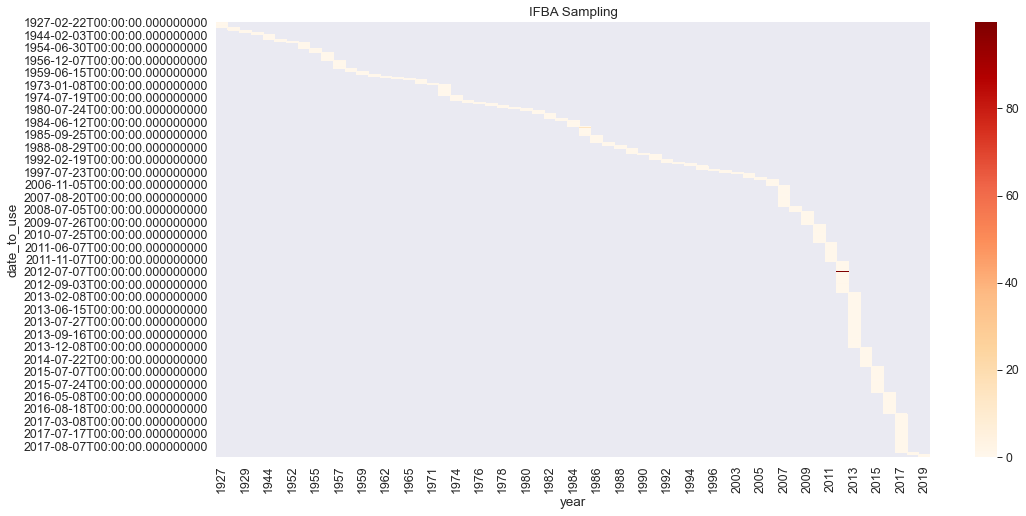

In [102]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
sampling_by_year = ifba_df.pivot_table(index='date_to_use', columns='year', values='Field_Length')
# You can separate data with lines
sns.heatmap(sampling_by_year, cmap='OrRd', linecolor='white', linewidth=0.0).set(title='IFBA Sampling')

[Text(0.5, 1.0, 'IFBA Fish Life Stage')]

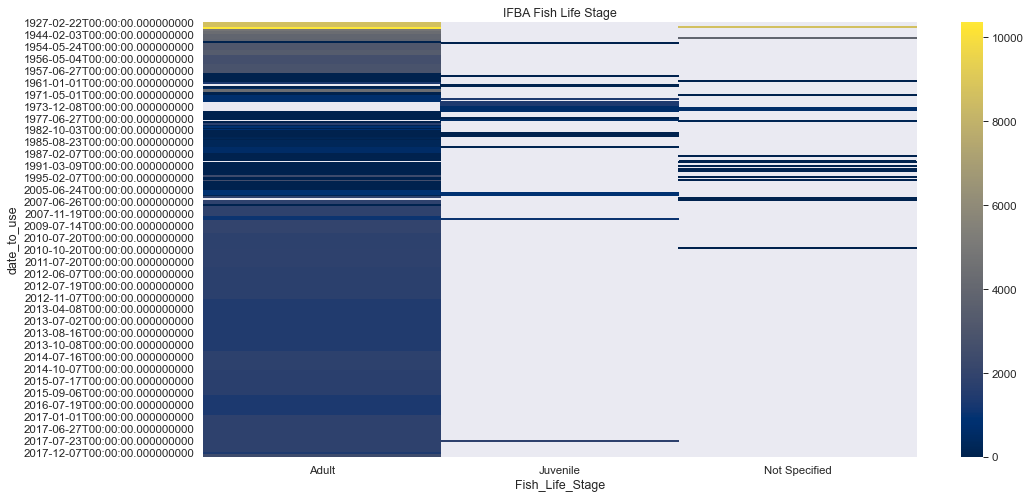

In [105]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.3)

# create a matrix with an index of month, columns representing years
life_stage_df = ifba_df.pivot_table(index='date_to_use', columns='Fish_Life_Stage', values='mean_weight_yr_species')
# You can separate data with lines
sns.heatmap(life_stage_df, cmap='cividis', linewidth=0).set(title='IFBA Fish Life Stage')

### Cluster Map

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 576x432 with 0 Axes>

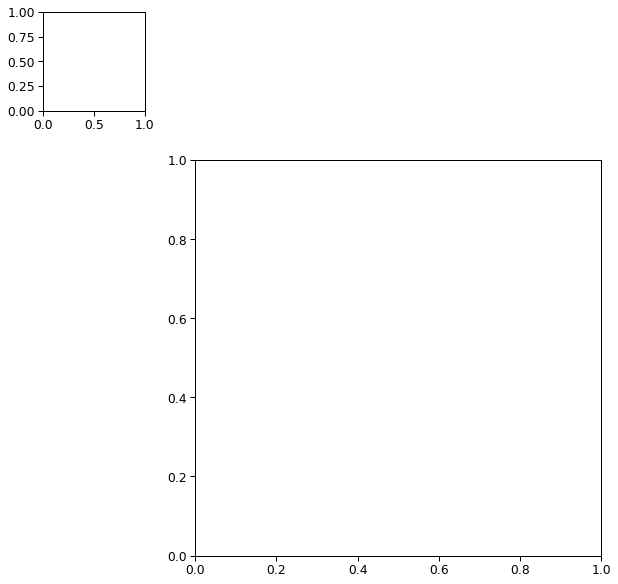

In [11]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
# iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)
ifba_df.columns
ifba_simplified = ifba_df[['year', 'month', 'Field_Length']]
ifba_simplified.dtypes

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
# sns.clustermap(flights,cmap="Blues", standard_scale=1)
sns.clustermap(ifba_simplified,cmap="Blues", standard_scale=1)



### PairGrid

<Figure size 576x432 with 0 Axes>

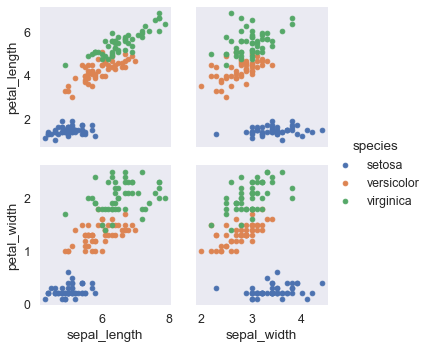

In [39]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()

### Facet Grid

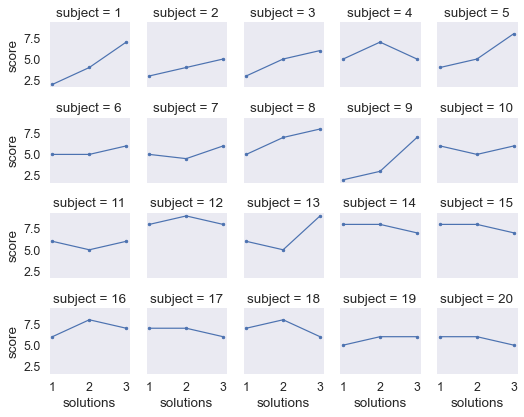

In [40]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plots

In [41]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

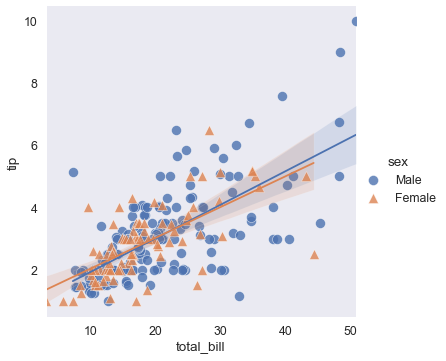

In [42]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

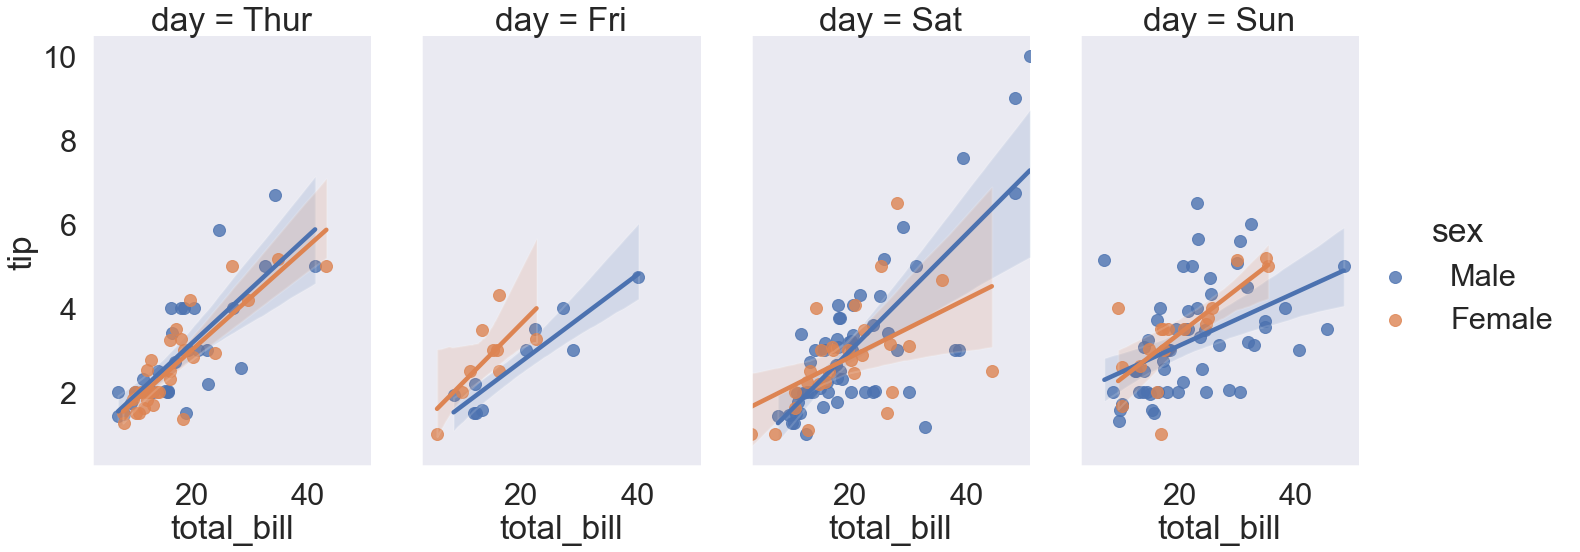

In [43]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)

## Ridge Plots

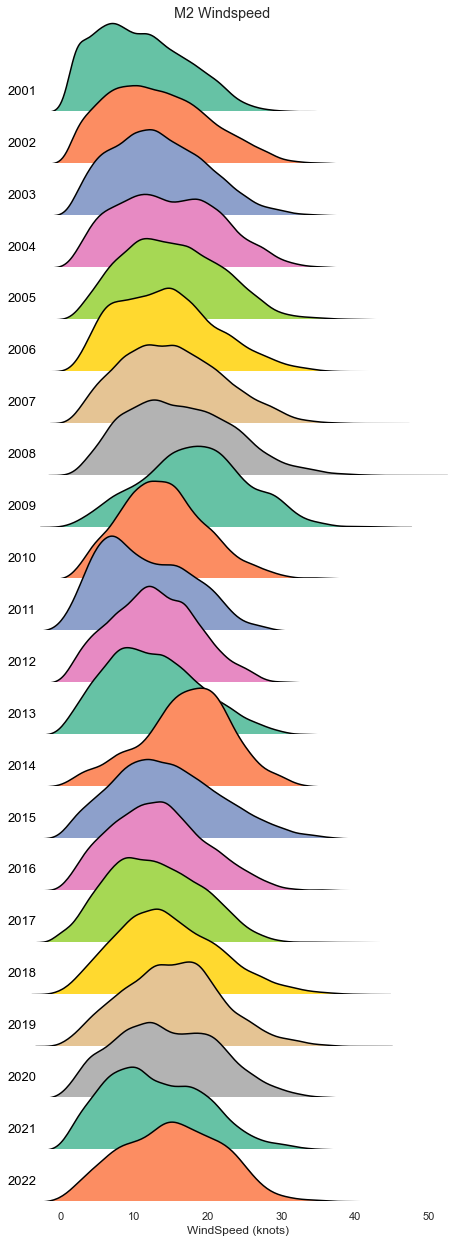

In [57]:
# csv = "..\data\ifba.csv"
# df = pd.read_csv(csv)
# Theme
sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)# create a grid with a row for each 'Language'
g = sns.FacetGrid(m2_df, palette=palette, row="year", hue="year", aspect=9, height=0.8) # map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="WindSpeed (knots)", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="WindSpeed (knots)", color='black')# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "year")# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)# remove subplot titles
g.set_titles("")# remove yticks and set xlabel
g.set(yticks=[], xlabel="WindSpeed (knots)")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('M2 Windspeed', y=0.98)
plt.savefig('ridgeplot.png')